<Axes: xlabel='job_posted_month'>

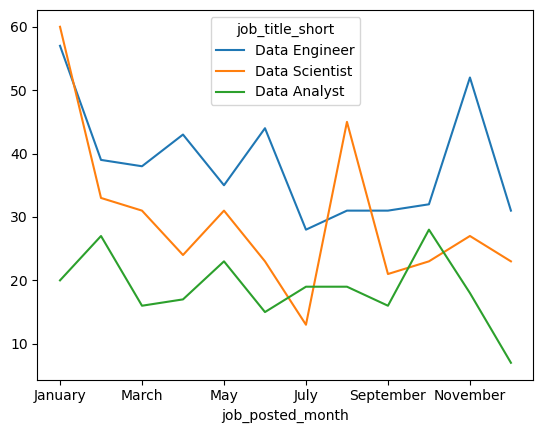

In [ ]:
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')


df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_Norge = df[df['job_country']== 'Norway'].copy()

df_Norge['job_posted_month'] = df_Norge['job_posted_date'].dt.strftime('%B')

df_Norge_pivot = df_Norge.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
# Convert all float columns in df_Norge_pivot to nullable integers (Int64)
# This will remove the .0 and handle any NaN values gracefully.
for col in df_Norge_pivot.columns:
    if df_Norge_pivot[col].dtype == 'float64': # Check if the column is a float type
        df_Norge_pivot[col] = df_Norge_pivot[col].astype('Int64') # Use 'Int64' for nullable integers
        
df_Norge_pivot.reset_index(inplace=True)
df_Norge_pivot['month_no'] = pd.to_datetime(df_Norge_pivot['job_posted_month'], format='%B').dt.month

df_Norge_pivot.sort_values('month_no',inplace = True)
df_Norge_pivot.set_index('job_posted_month', inplace = True)
df_Norge_pivot.drop(columns='month_no',inplace = True)



top_3 = df_Norge['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

df_Norge_pivot[top_3].plot(kind='line')



In [110]:
df_Norge_software_pivot = pd.read_csv("C:/Users/danie/anaconda3/Python_project/CSV_Norway_dev_jobs/norway_dev_jobs_random.csv", index_col='job_posted_month')
df_Norge_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer,Data Analyst,Data Scientist,Data Engineer
job_posted_month,,,,,,,
January,18,23,13,6,18,16,29
February,26,15,5,10,28,27,23
March,22,11,15,7,32,30,33
April,19,25,15,12,23,17,35
May,18,21,19,6,35,21,34
June,22,14,14,8,16,17,27
July,22,10,20,6,34,15,33
August,15,21,16,10,29,19,27
September,19,19,16,8,21,23,40


In [111]:
df_Norge_merged = df_Norge_pivot.merge(df_Norge_software_pivot, on='job_posted_month')
df_Norge_merged

,Business Analyst,Cloud Engineer,Data Analyst_x,Data Engineer_x,Data Scientist_x,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer,Data Analyst_y,Data Scientist_y,Data Engineer_y
job_posted_month,,,,,,,,,,,,,,,,,
January,16,5,20,57,60,6,5,16,14,21,18,23,13,6,18,16,29
February,18,11,27,39,33,1,7,15,14,22,26,15,5,10,28,27,23
March,12,6,16,38,31,6,4,4,4,22,22,11,15,7,32,30,33
April,22,7,17,43,24,5,2,4,6,18,19,25,15,12,23,17,35
May,10,2,23,35,31,1,5,6,5,6,18,21,19,6,35,21,34
June,22,2,15,44,23,4,1,10,9,15,22,14,14,8,16,17,27
July,12,1,19,28,13,2,<NA>,10,3,6,22,10,20,6,34,15,33
August,26,19,19,31,45,6,8,8,10,35,15,21,16,10,29,19,27
September,11,3,16,31,21,2,1,6,2,7,19,19,16,8,21,23,40


In [112]:
top_7 = (df_Norge_merged
         .sum()
         .sort_values(ascending=False)
         .head(7)
         .index
)

In [113]:
top_7

Index(['Data Engineer_x', 'Data Engineer_y', 'Data Scientist_x',
       'Data Analyst_y', 'Data Scientist_y', 'Front-End Developer',
       'Data Analyst_x'],
      dtype='object')

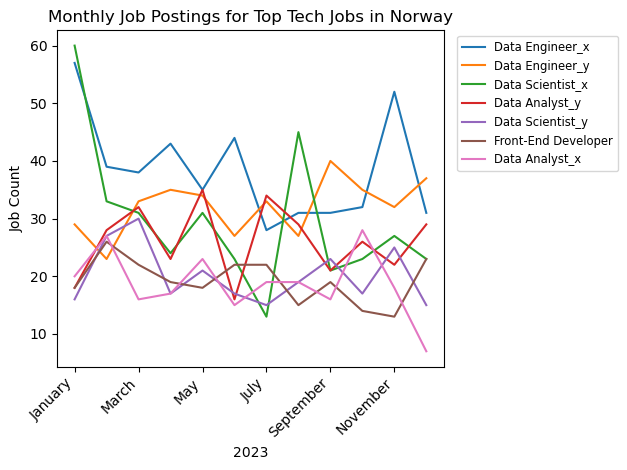

In [ ]:


# Your plotting code
df_Norge_merged[top_10].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in Norway')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='small')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right') # Rotate by 45 degrees, align to the right

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()